In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

> ## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


> ## Overview of the Data

> #### To understand the structure of the dataset, including the number of rows, columns, and data types

> ##  Data Loading

In [3]:
from scripts.data_loader import dataLoading
data=dataLoading()

> ## Check Loaded Dataset

In [4]:
data.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

> ## Summary Statistics

> #### To understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [6]:
data.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


> ## Distribution of Numerical Features

> #### Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

In [7]:
# Identify numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


> ### Count the value of each columns


In [8]:
for col in numerical_columns:
    if col=='Amount' or col=='Value':
        continue
    else:
        print(f'Value count of {data[col].value_counts()}\n And')
        print(f'{data[col].nunique()} Unique Value\n\n')

Value count of CountryCode
256    95662
Name: count, dtype: int64
 And
1 Unique Value


Value count of PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
 And
4 Unique Value


Value count of FraudResult
0    95469
1      193
Name: count, dtype: int64
 And
2 Unique Value




> ### Count the value of Amount and Value columns

In [9]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


In [10]:
print(data['Amount'].value_counts())


Amount
 1000.00      17091
-50.00         8513
 10000.00      8260
 2000.00       5489
 500.00        5246
              ...  
 6534.00          1
-6.45             1
-204.40           1
-2720.00          1
 243000.00        1
Name: count, Length: 1676, dtype: int64


> ### Check the Skewness value of numerical columns

In [11]:

from scripts.data_cleaning import display_skewness
display_skewness(data)

CountryCode
Skewness: 0.0
Kurtosis: 0.0
Amount
Skewness: 51.098489522819115
Kurtosis: 3363.1277386950474
Value
Skewness: 51.29108598736249
Kurtosis: 3378.069273754232
PricingStrategy
Skewness: 1.6590573072757961
Kurtosis: 2.087533632908269
FraudResult
Skewness: 22.196294806589147
Kurtosis: 490.6857618799325


{'CountryCode': {'Skewness': np.float64(0.0), 'Kurtosis': np.float64(0.0)},
 'Amount': {'Skewness': np.float64(51.098489522819115),
  'Kurtosis': np.float64(3363.1277386950474)},
 'Value': {'Skewness': np.float64(51.29108598736249),
  'Kurtosis': np.float64(3378.069273754232)},
 'PricingStrategy': {'Skewness': np.float64(1.6590573072757961),
  'Kurtosis': np.float64(2.087533632908269)},
 'FraudResult': {'Skewness': np.float64(22.196294806589147),
  'Kurtosis': np.float64(490.6857618799325)}}

> ### ✔Amount, Value and Fraud Result columns have high skew value

> ## Visualize the distribution of numerical features


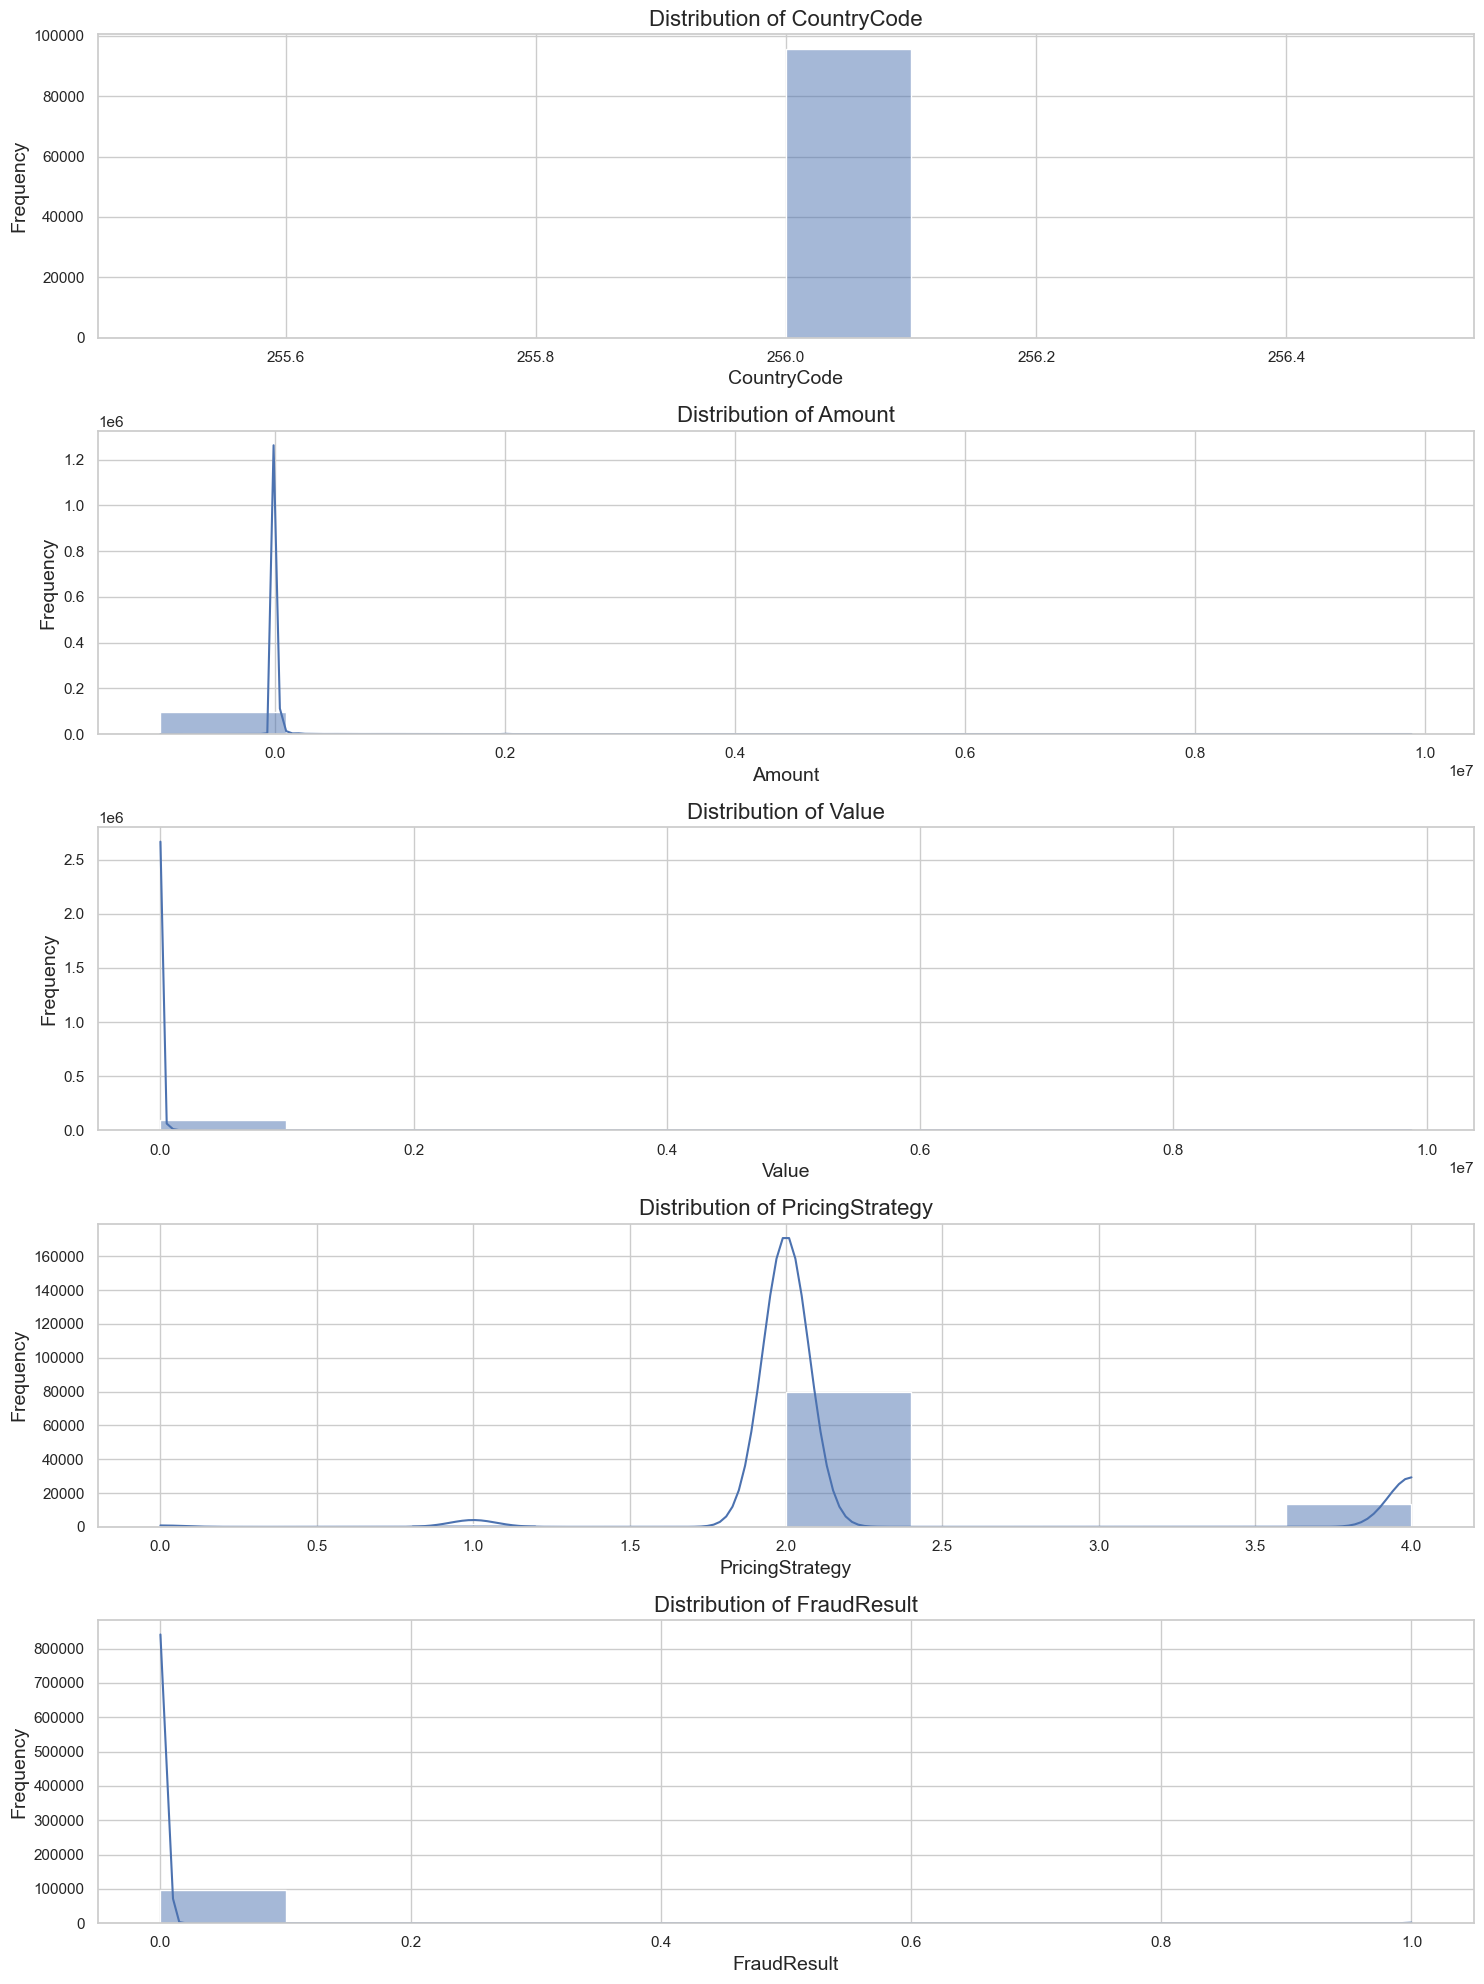

In [12]:
from scripts.visualize import visualize_numerical_features
visualize_numerical_features(data)

> ## Distribution of Categorical Features

> ### Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.


In [13]:
# Identify categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')


Distribution of many values column

In [14]:
print(data['AccountId'].value_counts())


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_2728        1
AccountId_3778        1
AccountId_1259        1
AccountId_1948        1
AccountId_918         1
Name: count, Length: 3633, dtype: int64


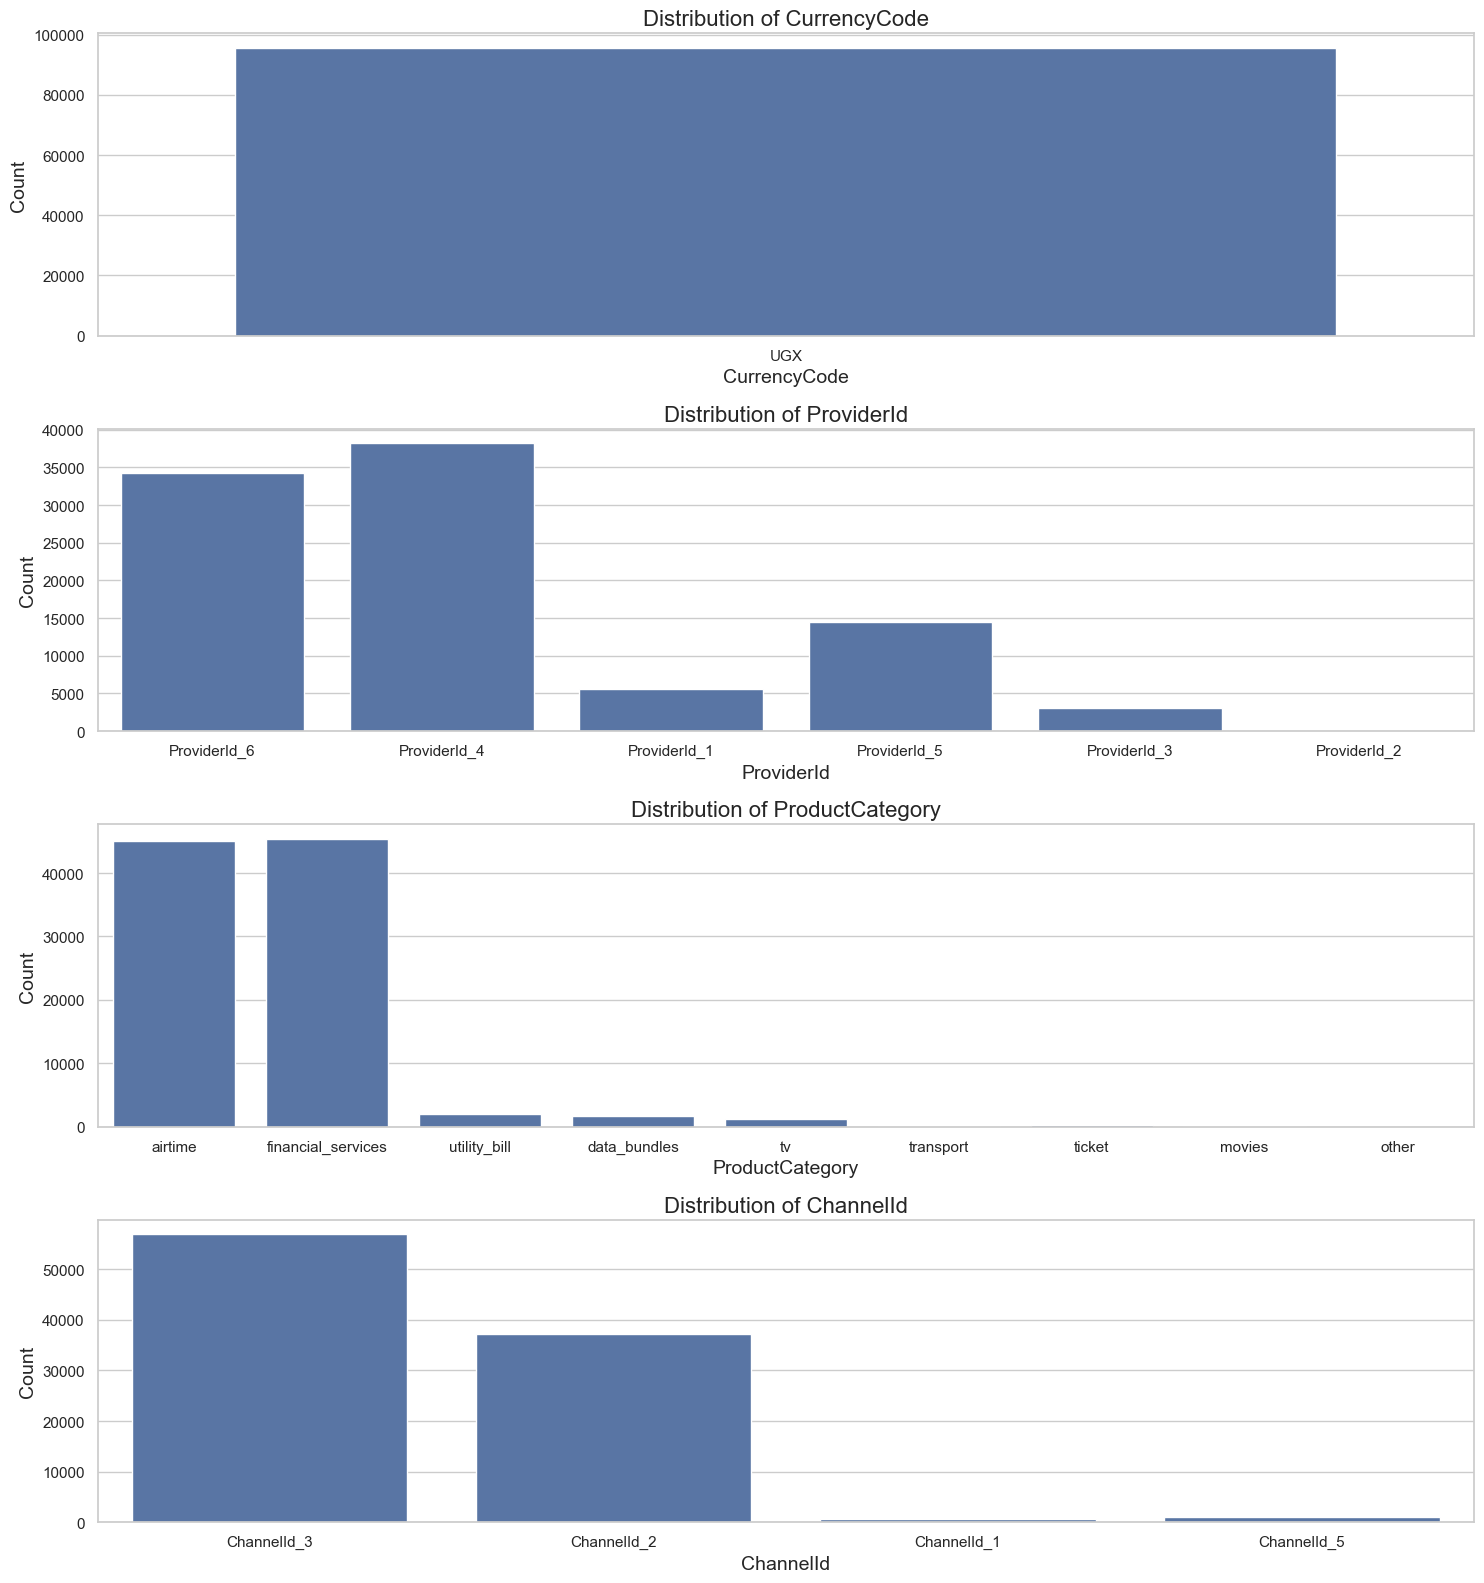

In [15]:
from scripts.visualize import visualize_categorical_features
data1 = data[[ 'CurrencyCode', 'CountryCode', 'ProviderId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult']]
visualize_categorical_features(data1)

In [16]:
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols]

,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,256,1000.0,1000,2,0
1,256,-20.0,20,2,0
2,256,500.0,500,2,0
3,256,20000.0,21800,2,0
4,256,-644.0,644,2,0
...,...,...,...,...,...
95657,256,-1000.0,1000,2,0
95658,256,1000.0,1000,2,0
95659,256,-20.0,20,2,0
95660,256,3000.0,3000,2,0


> ## Correlation Analysis

> ### To Understanding the relationship between numerical features.


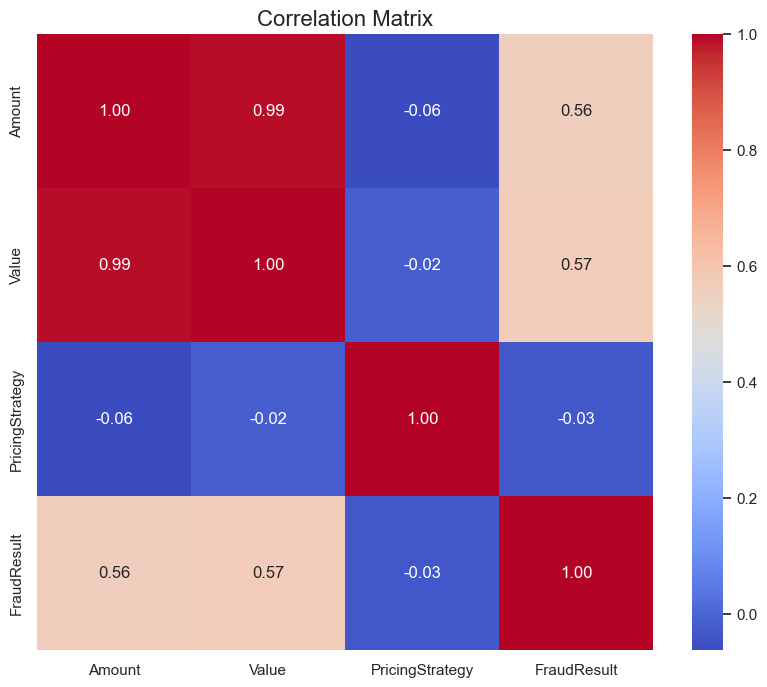

In [17]:
from scripts.visualize import correlation_analysis
correlation_analysis(data)

> ## Identifying Missing Values

> ### Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [18]:
from scripts.data_cleaning import find_missing_values
find_missing_values(data)

From 16 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


> ### The Datasets have no missing values

> ## Outlier Detection

> ### Using box plots to identify outliers.

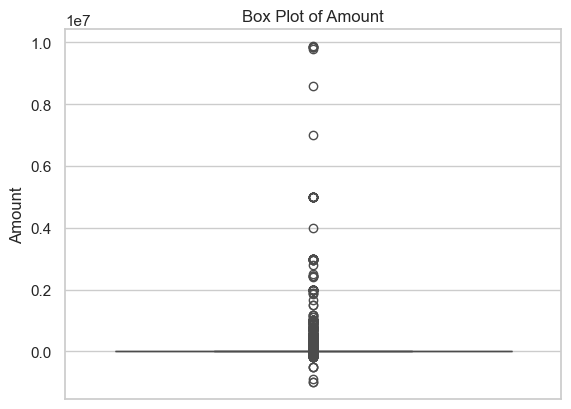

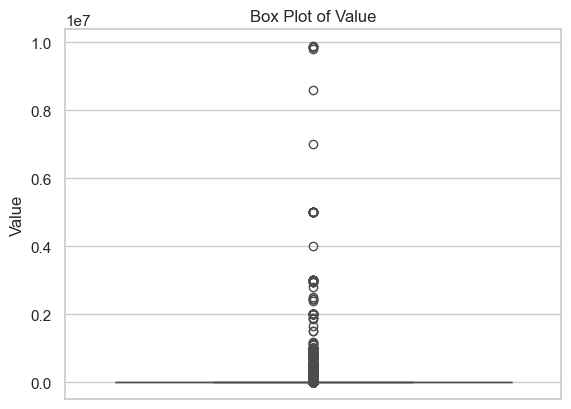

In [19]:
from scripts.data_cleaning import boxPlotForDetectOutliers
boxPlotForDetectOutliers(data,['Amount','Value'])

> ### From Numerical Columns Amount and Value have Outliers

> ## Remove outliers

In [20]:
from scripts.data_cleaning import remove_outliers_winsorization
data=remove_outliers_winsorization(data, ['Amount','Value'])

In [21]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


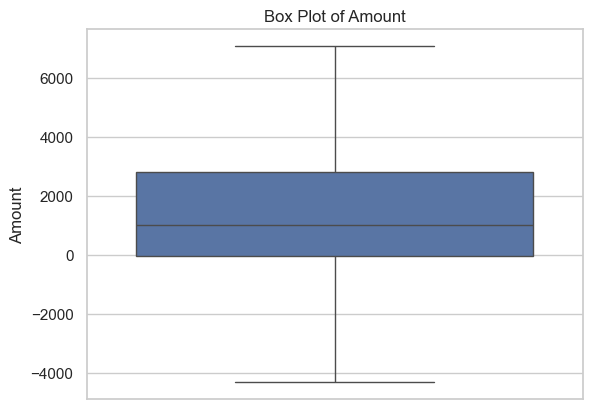

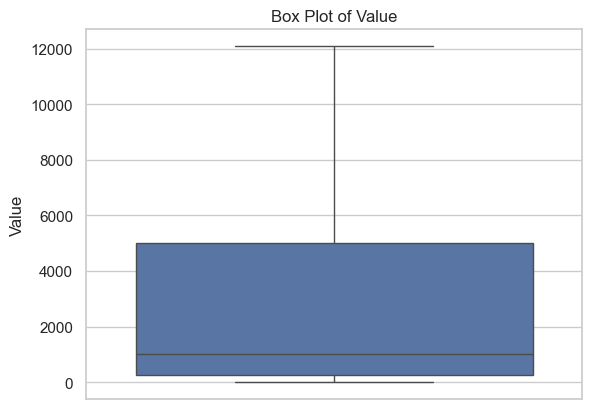

In [22]:
boxPlotForDetectOutliers(data,['Amount','Value'])

> # Feature Engineering

> ## Create Aggregate Features

In [23]:
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0


In [24]:
data.shape

(95662, 16)

In [25]:
from scripts.feature_engineering import aggregateFeatures
agg_data = aggregateFeatures(data)
new_dataframe = pd.merge(data, agg_data, on='AccountId', how='left')

In [26]:
new_dataframe.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2,0,136109.0,2062.257576,66,1928.782855
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15T02:19:08Z,2,0,-24212085.0,-783.740168,30893,1543.796173
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2,0,1000.0,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15T03:32:55Z,2,0,101600.0,3907.692308,26,2756.254426
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2,0,-24212085.0,-783.740168,30893,1543.796173
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000.0,2018-11-15T03:35:10Z,2,0,2000.0,2000.000000,1,NaN
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,7075.0,10000.0,2018-11-15T03:44:31Z,4,0,84050.0,4669.444444,18,2127.231623
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500.0,2018-11-15T03:45:13Z,2,0,-24212085.0,-783.740168,30893,1543.796173
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500.0,2018-11-15T04:14:59Z,2,0,8200.0,2733.333333,3,3696.394640
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600.0,2018-11-15T04:31:48Z,2,0,13800.0,2300.000000,6,1862.256696


In [27]:
new_dataframe.shape

(95662, 20)

> ## Extract Date and Time Features

In [28]:
from scripts.feature_engineering import extractDateAndTime
new_dataframe=extractDateAndTime(new_dataframe)
new_dataframe[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head(10)


,TransactionStartTime,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,2018-11-15 02:18:49+00:00,2,15,11,2018
1,2018-11-15 02:19:08+00:00,2,15,11,2018
2,2018-11-15 02:44:21+00:00,2,15,11,2018
3,2018-11-15 03:32:55+00:00,3,15,11,2018
4,2018-11-15 03:34:21+00:00,3,15,11,2018
5,2018-11-15 03:35:10+00:00,3,15,11,2018
6,2018-11-15 03:44:31+00:00,3,15,11,2018
7,2018-11-15 03:45:13+00:00,3,15,11,2018
8,2018-11-15 04:14:59+00:00,4,15,11,2018
9,2018-11-15 04:31:48+00:00,4,15,11,2018


> ## Encoding Categorical Variables

> #### using One-Hot Encoding for categorical features

In [29]:
new_dataframe.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'StdTransactionAmount', 'TransactionHour',
       'TransactionDay', 'TransactionMonth', 'TransactionYear'],
      dtype='object')

In [30]:
import re
new_dataframe['ProviderId'] = new_dataframe['ProviderId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [31]:
new_dataframe['ProductId'] = new_dataframe['ProductId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [32]:
new_dataframe['ChannelId'] = new_dataframe['ChannelId'].apply(lambda val: int(re.search(r'\d+', val).group()))


In [33]:
new_dataframe.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,6,10,airtime,...,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,6,1,airtime,...,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,1,21,utility_bill,...,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,6,3,airtime,...,2,0,2000.0,2000.000000,1,NaN,3,15,11,2018
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,5,3,airtime,...,4,0,84050.0,4669.444444,18,2127.231623,3,15,11,2018
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,4,6,financial_services,...,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,6,10,airtime,...,2,0,8200.0,2733.333333,3,3696.394640,4,15,11,2018
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,1,15,financial_services,...,2,0,13800.0,2300.000000,6,1862.256696,4,15,11,2018


In [34]:
pd.set_option('display.max_columns',None)
from scripts.feature_engineering import encodingCategoricalVariables
new_dataframe_encoded = encodingCategoricalVariables(new_dataframe)
new_dataframe_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


> ## Handling Missing Values

> ### The given datasets have no any missing values

> ## Normalization of Numerical Features

> #### Normalization: Rescale the numerical features to the range [0, 1] using MinMaxScaler

In [35]:
new_dataframe_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   CountryCode                         95662 non-null  int64              
 6   ProviderId                          95662 non-null  int64              
 7   ProductId                           95662 non-null  int64              
 8   ChannelId                           95662 non-null  int64              
 9   Amount                              956

In [36]:
numerical_columns_new=new_dataframe_encoded.select_dtypes(include=['float64', 'int64',]).columns


In [37]:
print(numerical_columns_new)


Index(['CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy', 'FraudResult', 'TotalTransactionAmount',
       'AverageTransactionAmount', 'TransactionCount', 'StdTransactionAmount',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill'],
      dtype='object')


In [38]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,1449.051201,3403.667282,2.255974,0.002018
std,0.0,3210.808287,4168.243292,0.732924,0.044872
min,256.0,-4325.000000,2.000000,0.000000,0.000000
25%,256.0,-50.000000,275.000000,2.000000,0.000000
50%,256.0,1000.000000,1000.000000,2.000000,0.000000
75%,256.0,2800.000000,5000.000000,2.000000,0.000000
max,256.0,7075.000000,12087.500000,4.000000,1.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
new_dataframe_encoded_normalize = min_max_scaler.fit_transform(new_dataframe_encoded[numerical_columns_new])


In [40]:
# Convert the normalized data to a DataFrame with the original column names
normalized_df = pd.DataFrame(new_dataframe_encoded_normalize, columns=numerical_columns_new)

df_normalized = normalized_df.copy()
df_normalized[numerical_columns_new] = normalized_df


print("Normalized DataFrame:")
df_normalized.head(10)


Normalized DataFrame:


,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,0.0,1.0,0.346154,0.50,0.467105,0.082578,0.5,0.0,0.929479,0.560286,0.002104,0.414861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.6,0.192308,0.25,0.377632,0.001489,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.000000,0.50,0.423246,0.041206,0.5,0.0,0.924321,0.423246,0.000032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.769231,0.50,1.000000,1.000000,0.5,0.0,0.928161,0.722166,0.000809,0.592841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.6,0.192308,0.25,0.322895,0.053122,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.076923,0.50,0.554825,0.165322,0.5,0.0,0.924359,0.554825,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.8,0.076923,0.50,1.000000,0.827272,1.0,0.0,0.927492,0.788986,0.000550,0.457545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.6,0.192308,0.25,0.335526,0.041206,0.5,0.0,0.000000,0.310637,1.000000,0.332054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.346154,0.50,0.423246,0.041206,0.5,0.0,0.924596,0.619152,0.000065,0.795056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.538462,0.50,0.432018,0.049481,0.5,0.0,0.924810,0.581140,0.000162,0.400552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


> # Default estimator and WoE binning 

In [41]:
new_dataframe_encoded.head(10)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,6,10,3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,136109.0,2062.257576,66,1928.782855,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,4,6,2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,2,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,6,1,3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,1000.0,500.000000,2,0.000000,2,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,1,21,3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,101600.0,3907.692308,26,2756.254426,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,4,6,2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,256,6,3,3,2000.0,2000.0,2018-11-15 03:35:10+00:00,2,0,2000.0,2000.000000,1,NaN,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,256,5,3,3,7075.0,10000.0,2018-11-15 03:44:31+00:00,4,0,84050.0,4669.444444,18,2127.231623,3,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,256,4,6,2,-500.0,500.0,2018-11-15 03:45:13+00:00,2,0,-24212085.0,-783.740168,30893,1543.796173,3,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,256,6,10,3,500.0,500.0,2018-11-15 04:14:59+00:00,2,0,8200.0,2733.333333,3,3696.394640,4,15,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,256,1,15,3,600.0,600.0,2018-11-15 04:31:48+00:00,2,0,13800.0,2300.000000,6,1862.256696,4,15,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


> ## Calculate RFMS Scores

In [42]:
from scripts.credit_risk_analysis import calculateRFMSscores

rfms_new_dataframe_encoded = calculateRFMSscores(new_dataframe_encoded)
print(rfms_new_dataframe_encoded[['Recency', 'Frequency', 'Monetary', 'Seasonality', 'RFMS_Score', 'RiskCategory']].head(10).to_string(index=True))

                 Recency  Frequency  Monetary  Seasonality    RFMS_Score RiskCategory
CustomerId                                                                           
CustomerId_1          83          1   -4325.0     4.000000  -4403.000000          bad
CustomerId_10         83          1   -4325.0     4.000000  -4403.000000          bad
CustomerId_1001       89          5   14825.0     4.000000  14745.000000         good
CustomerId_1002       25         11    4225.0     3.181818   4214.181818         good
CustomerId_1003       11          6   14825.0     1.000000  14821.000000         good
CustomerId_1004       52          1    2000.0     4.000000   1953.000000         good
CustomerId_1005       46          9   34850.0     4.000000  34817.000000         good
CustomerId_1006       64          1    1000.0     4.000000    941.000000         good
CustomerId_1007       81          1    7075.0     4.000000   6999.000000         good
CustomerId_1008       65          2   14150.0     4.00

> ## Visualize the RFMS Score

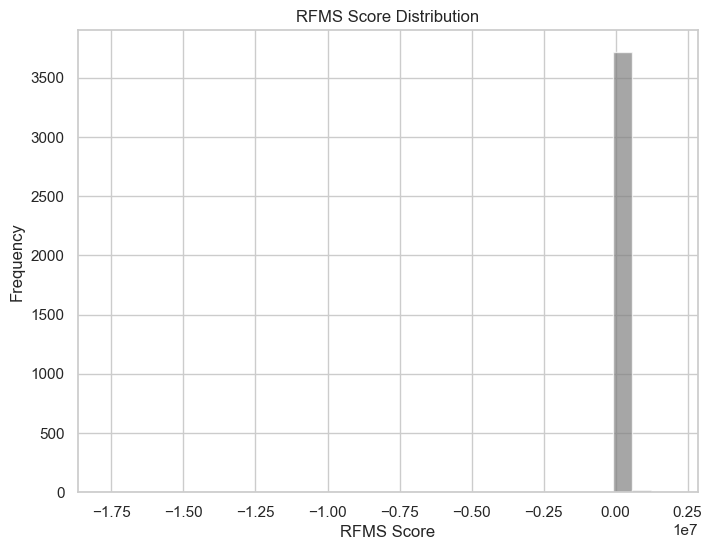

In [43]:
from scripts.credit_risk_analysis import visualizeRFMSscore
visualizeRFMSscore(rfms_new_dataframe_encoded)